# EGSIS = Exploratory Graph-based Semi Supervised Image Segmentation

Unindo todas as partes: 

- criação de superpixels
- criação de rede complexa
- aplicação da dinâmica coletiva (LCU)
- classificando as regiões não conhecidas
- obtendo segmentos da imagem

Essa variação contém um anotador que desenvolvi para não ser necessário pré-segmentar a imagem com superpixels pra realizar a anotação. Por esse motivo, as gerações prévias dos superpixels e redes complexas serão omitidas.

In [1]:
import os
os.environ["LOGURU_LEVEL"] = "DEBUG"

In [2]:
# ref: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_segmentations.html

import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut, cat, microaneurysms, rocket, horse, retina, coins
from skimage.util import img_as_ubyte

from egsis import model
from egsis import image
from egsis.annotators import PointAnnotator

# Label annotation

In [3]:
img = img_as_ubyte(retina())

annotator = PointAnnotator(img, classes=["bg", "retina"], resize_f=0.4)
annotator.display()

# Model EGSIS execution

2023-11-12 00:43:24.470 | INFO     | egsis.model:fit_predict:146 - Run!
2023-11-12 00:43:26.670 | INFO     | egsis.model:fit_predict:148 - Superpixels: finished.
2023-11-12 00:43:30.233 | INFO     | egsis.model:build_complex_network:110 - Complex networks: compute node labels finished.
2023-11-12 00:43:36.282 | INFO     | egsis.model:build_complex_network:117 - Complex networks: feature extraction finished.
2023-11-12 00:43:36.284 | INFO     | egsis.model:build_complex_network:122 - Complex networks: compute node weights finished.
2023-11-12 00:43:36.284 | INFO     | egsis.model:fit_predict:150 - Complex networks: finished.
2023-11-12 00:43:36.315 | INFO     | egsis.lcu:__init__:91 - hyperparams: n_classes=2, competition_level=1, scale_particles=100, max_iter=100
2023-11-12 00:43:36.316 | DEBUG    | egsis.lcu:n0:220 - n0: classes=2, shape=(2, 49)
2023-11-12 00:43:36.318 | DEBUG    | egsis.lcu:n0:227 - n0: [[1.15384615 0.         0.         1.15384615 0.         0.
  0.         0.      

(-0.5, 1410.5, 1410.5, -0.5)

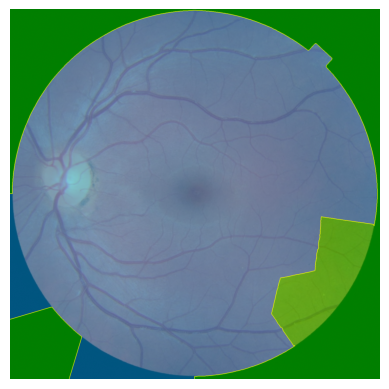

In [5]:
X = img
y = annotator.label_matrix

m = model.EGSIS(
    superpixel_segments=53,
    superpixel_sigma=0.3,
    superpixel_compactness=40,
    feature_extraction="comatrix",
    feature_similarity="euclidian_exp",
)

# Fit predict receiving a image mask
mask = m.fit_predict_segmentation_mask(X, y)
plt.imshow(image.segmentation_mask_blend(img, mask, annotator.labels_by_color))
plt.axis('off')